In [1]:
from keypress_recognition.models import white_key_model as wmodel
from keypress_recognition import dataset
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
dataset.load_all_data(train=100, test=20, val=10)

# of X_train: 100
# of X_test: 20
# of X_val: 10


In [3]:
def visualize_keys(note):
    """
    note: bool
    return: str
    """
    return ("Pressed" if note else "Not Pressed")
visualize_keys(True)

'Pressed'

Samples from X_train: 


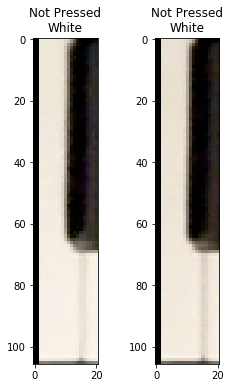

Samples from X_test: 


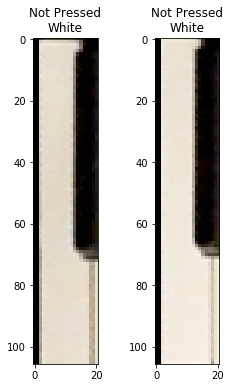

Samples from X_val: 


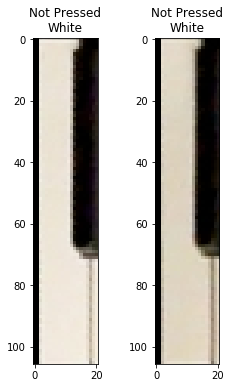

In [4]:
# print several images with labels

for _type in ['train', 'test', 'val']:

    print(f'Samples from X_{_type}: ')

    fig, axarr = plt.subplots(1, 2, figsize=[4, 6])

    for i in range(0, 2):
        imgw, _, notew, _ = dataset.get_sample(_type, method=0)
        axarr[i].imshow(imgw[0])
        axarr[i].set_title(visualize_keys(notew[0]) + '\nWhite')

    plt.show()

In [5]:
wmodel.train(dataset, batch_size=32, num_epochs=10,
                     learning_rate=1e-3,
                     best_path='keypress_recognition/best_white_model.tar',
                     current_path='keypress_recognition/current_white.tar',
                     method=0, key_type='white')

Epoch 1/10


IntProgress(value=0)

train Loss: 0.5663
Precision: 0.02
Recall   : 1.00


IntProgress(value=0, max=10)

val Loss: 2.7173
Precision: 0.02
Recall   : 1.00
The best model has been saved to keypress_recognition/best_white_model.tar ...
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 2/10


IntProgress(value=0)

train Loss: 0.3783
Precision: 0.02
Recall   : 1.00


IntProgress(value=0, max=10)

val Loss: 7.6976
Precision: 0.02
Recall   : 1.00
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 3/10


IntProgress(value=0)

train Loss: 0.2023
Precision: 0.02
Recall   : 1.00


IntProgress(value=0, max=10)

val Loss: 13.0052
Precision: 0.02
Recall   : 1.00
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 4/10


IntProgress(value=0)

train Loss: 0.1542
Precision: 0.02
Recall   : 1.00


IntProgress(value=0, max=10)

val Loss: 14.3016
Precision: 0.02
Recall   : 1.00
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 5/10


IntProgress(value=0)

train Loss: 0.1030
Precision: 0.02
Recall   : 1.00


IntProgress(value=0, max=10)

val Loss: 10.9274
Precision: 0.02
Recall   : 1.00
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 6/10


IntProgress(value=0)

train Loss: 0.0914
Precision: 0.02
Recall   : 1.00


IntProgress(value=0, max=10)

val Loss: 7.7136
Precision: 0.02
Recall   : 0.99
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 7/10


IntProgress(value=0)

train Loss: 0.0733
Precision: 0.02
Recall   : 0.94


IntProgress(value=0, max=10)

val Loss: 4.5095
Precision: 0.02
Recall   : 0.88
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 8/10


IntProgress(value=0)

train Loss: 0.0667
Precision: 0.02
Recall   : 0.35


IntProgress(value=0, max=10)

val Loss: 2.2206
Precision: 0.02
Recall   : 0.37
The best model has been saved to keypress_recognition/best_white_model.tar ...
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 9/10


IntProgress(value=0)

train Loss: 0.0638
Precision: 0.02
Recall   : 0.10


IntProgress(value=0, max=10)

val Loss: 0.8436
Precision: 0.02
Recall   : 0.15
The best model has been saved to keypress_recognition/best_white_model.tar ...
Current mode has been saved to keypress_recognition/current_white.tar ...

Epoch 10/10


IntProgress(value=0)

train Loss: 0.0575
Precision: 0.02
Recall   : 0.06


IntProgress(value=0, max=10)

val Loss: 0.5055
Precision: 0.02
Recall   : 0.08
The best model has been saved to keypress_recognition/best_white_model.tar ...
Current mode has been saved to keypress_recognition/current_white.tar ...

Training complete in 1m 36s
Best val loss: 0.505531


Ground Truth: False
Predict:      Pressed


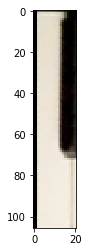

In [15]:
Xw, _, yw, _ = dataset.get_sample('train', method=0)
plt.imshow(Xw[0])

Xw = np.transpose(np.array(Xw), (0, 3, 1, 2))
yw_pred = wmodel.evaluate(torch.Tensor(Xw).cuda())[0]
print("Ground Truth:", yw[0])
print("Predict:     ", visualize_keys(yw_pred))

plt.show()

In [9]:
torch.cuda.empty_cache()